## **Librerías**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [4]:
from sklearn import datasets

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [46]:
import warnings
warnings.filterwarnings('ignore')

## **Datos**

In [5]:
iris = datasets.load_iris()

In [27]:
df_features = pd.DataFrame(iris['data'])
df_features.columns = list(iris['feature_names'])

In [28]:
df_target = pd.DataFrame(iris['target'])
df_target.columns = ['species']

In [36]:
df_iris = pd.merge(
    df_target.reset_index(),
    df_features.reset_index()
)

df_iris.drop('index', axis=1, inplace=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    df_features, 
    df_target, 
    random_state=13, 
    test_size=0.1
)

## **Modelo**

In [47]:
model = svm.SVC()

In [56]:
model.fit(X_train, y_train)

SVC()

In [53]:
accuracy = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10)

In [55]:
print(f'La precisión promedio del modelo es de {round(accuracy.mean() * 100, 2)}%')

La precisión promedio del modelo es de 97.03%


In [57]:
y_pred = model.predict(X_test)

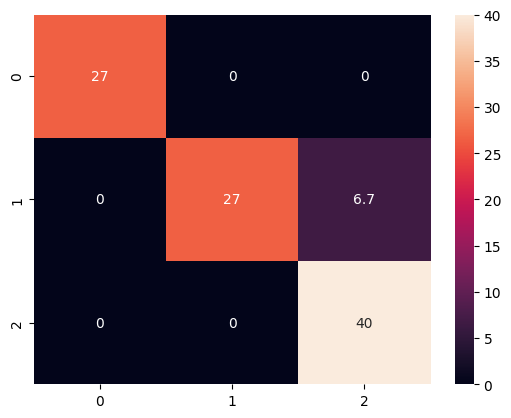

In [63]:
sns.heatmap(confusion_matrix(y_pred, y_test)/len(y_pred)*100, annot=True)

plt.show()